## [Open original folder](https://drive.google.com/drive/folders/1IHovD--nesR_stGT2TbqnTBLhk623gsZ?usp=sharing) ##

## Semantic Segmentation using the U-Net ##

Caution: modify the path ```/content/drive/My Drive/~.tmp/intro-to-deep-learning/Labs/Lab5-Segmentation``` in the lines of code of this file, according to your path in Drive. Eg: if the location of your folder is in the default path of your drive, then modify the last path to: ```/content/drive/My Drive/Lab5-Segmentation```

### Preparing libraries ###

In [1]:
# first Runtime > Factory Reset Runtime
# then click on Reconect, wait until reconection finish
# then run this block
# then Runtime > Restart Runtime, wait until reconection finish
# then run agin this block

!pip install tensorflow-gpu==1.15
!pip install keras==2.1.5

In [2]:
import tensorflow
import keras
tensorflow.test.gpu_device_name()

Using TensorFlow backend.


'/device:GPU:0'

In [3]:
print(tensorflow.__version__)
print(keras.__version__)

# should print something like:
# 1.15.2
# 2.1.5

1.15.0
2.1.5


### Connecting to Drive ###

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import sys
import os

# before this, connect to google drive: lateral bar Files -> click on Mound Drive icon

py_file_location = "/content/drive/My Drive/~.tmp/intro-to-deep-learning/Labs/Lab5-Segmentation"
sys.path.append(os.path.abspath(py_file_location))


### Import the Dataset ###

In [6]:
!wget --no-check-certificate \
    -r 'https://docs.google.com/uc?export=download&id=1mjPuhgbjcadbyCV0CRp-C4w4YtuvuhRo' \
    -O /tmp/dataset-membranes.zip

will be placed in the single file you specified.

--2020-08-24 09:47:53--  https://docs.google.com/uc?export=download&id=1mjPuhgbjcadbyCV0CRp-C4w4YtuvuhRo
Resolving docs.google.com (docs.google.com)... 74.125.20.138, 74.125.20.139, 74.125.20.101, ...
Connecting to docs.google.com (docs.google.com)|74.125.20.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-5g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/01l2svrlahecs5depc4583t4igm6skpq/1598262450000/02133894314206366517/*/1mjPuhgbjcadbyCV0CRp-C4w4YtuvuhRo?e=download [following]
--2020-08-24 09:47:55--  https://doc-0o-5g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/01l2svrlahecs5depc4583t4igm6skpq/1598262450000/02133894314206366517/*/1mjPuhgbjcadbyCV0CRp-C4w4YtuvuhRo?e=download
Resolving doc-0o-5g-docs.googleusercontent.com (doc-0o-5g-docs.googleusercontent.com)... 74.125.20.132, 2607:f8b0:400e:c07::84
Connecting to doc-

In [7]:
import os
import zipfile

local_zip = '/tmp/dataset-membranes.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

### Import Modules ###

In [8]:
import model
import data

from model import *
from data import *

### Preprocess the data ###

In [9]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'/tmp/dataset-membranes/train','image','label',data_gen_args,save_to_dir = None)

### Define model ###

In [10]:
model = unet()
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 64) 36928       conv2d_1[0][0]                   
_________________________________________________________________________________________

/content/drive/My Drive/~.tmp/intro-to-deep-learning/Labs/Lab5-Segmentation/model.py:61: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


### Training ###

In [11]:
model_checkpoint = ModelCheckpoint('/content/drive/My Drive/~.tmp/intro-to-deep-learning/Labs/Lab5-Segmentation/unet_weights.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=200,epochs=3,callbacks=[model_checkpoint])




Epoch 1/3
Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.





200/200 [==============================] - 48s 241ms/step - loss: 0.3386 - acc: 0.8423

Epoch 00001: loss improved from inf to 0.33860, saving model to /content/drive/My Drive/~.tmp/intro-to-deep-learning/Labs/Lab5-Segmentation/unet_weights.hdf5
Epoch 2/3
200/200 [==============================] - 37s 185ms/step - loss: 0.2532 - acc: 0.8899

Epoch 00002: loss improved from 0.33860 to 0.25315, saving model to /content/drive/My Drive/~.tmp/intro-to-deep-learning/Labs/Lab5-Segmentation/unet_weights.hdf5
Epoch 3/3
200/200 [==============================] - 37s 183ms/step - loss: 0.2145 - acc: 0.9075

Epoch 00003: loss improved from 0.25315 to 0.21446, saving model to /content/drive/My Drive/~.tmp/intro-to-deep-learning/Labs/Lab5-Segmentation/unet_weights.hdf5


### Testing ###

Note: Given an image, generates the result in a single image where a certain pixel corresponds to the probability of matching the class. So, we use a thresholding to convert from a image composed with probabilities to a binary image

In [12]:
testGene = testGenerator("/tmp/dataset-membranes/test")
results = model.predict_generator(testGene,30,verbose=1)
saveResult("/tmp/dataset-membranes/test",results,thresholding=0.7)

30/30 [==============================] - 3s 91ms/step


### Testing Visualization ###

In [13]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy

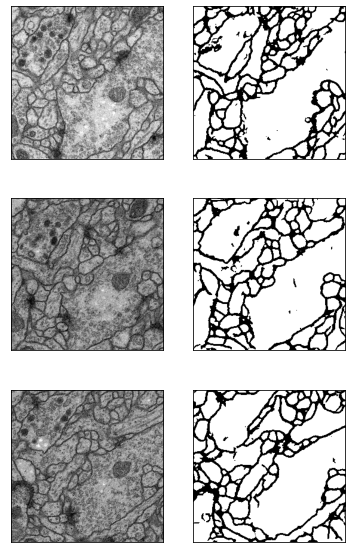

In [14]:
plt.figure(figsize=(6,10))

for i in range(3*2):
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img1=Image.open("/tmp/dataset-membranes/test/"+str(i)+".png")
    img2=Image.open("/tmp/dataset-membranes/test/"+str(i)+"_predict.png")
    if i%2==0:
      plt.imshow(img1,cmap='gray')
    if i%2==1:
      plt.imshow(img2,cmap='gray')

plt.show()

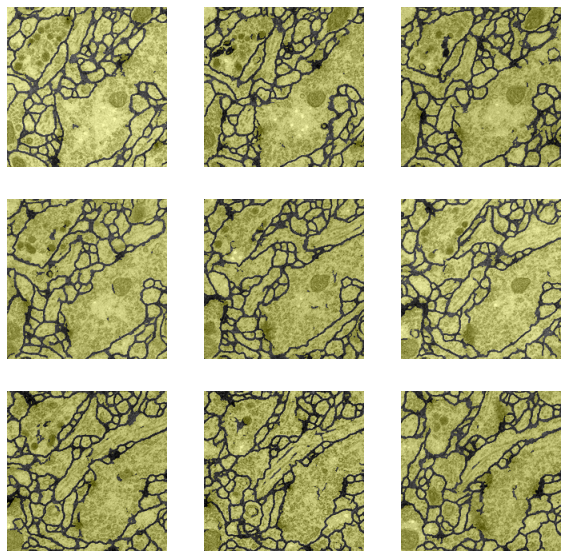

In [15]:
plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    img1=Image.open("/tmp/dataset-membranes/test/"+str(i)+".png")
    img1=img1.resize((200, 200), Image.ANTIALIAS)
    img2=Image.open("/tmp/dataset-membranes/test/"+str(i)+"_predict.png")
    img2=img2.resize((200, 200), Image.ANTIALIAS)
    
    rgbimg1=Image.new("RGB",img1.size)
    rgbimg1.paste(img1)
    rgbimg2=Image.new("RGB",img2.size)
    rgbimg2.paste(img2)
    
    rgbimg1=numpy.asarray(rgbimg1)
    rgbimg2=numpy.asarray(rgbimg2)
    
    rgbimg2_ = rgbimg2.copy()
    rgbimg2_[rgbimg2_ >= 125] = 255
    rgbimg2_[rgbimg2_ < 125] = 0
    rgbimg2__ = rgbimg2_.copy()
   
    for i in range(0,200):
      for j in range(0,200):
        rgbimg2__[i][j] = [rgbimg2_[i][j][0],rgbimg2_[i][j][1],0]
    
    plt.imshow(rgbimg1, cmap='gray') # I would add interpolation='none'
    plt.imshow(rgbimg2__, cmap='gray', alpha=0.3) # interpolation='none'
    plt.axis('off')

plt.show()

### Inference ###

Note: Given an image, generates the result in a single image where a certain pixel corresponds to the probability of matching the class. So, we use a thresholding to convert from a image composed with probabilities to a binary image

In [16]:
from model import *
from data import *

testGene = testGenerator("/tmp/dataset-membranes/test")
model = unet()
model.load_weights("/content/drive/My Drive/~.tmp/intro-to-deep-learning/Labs/Lab5-Segmentation/unet_weights.hdf5")
results = model.predict_generator(testGene,15,verbose=1)
saveResult("/tmp/dataset-membranes/test",results,thresholding=0.5)

/content/drive/My Drive/~.tmp/intro-to-deep-learning/Labs/Lab5-Segmentation/model.py:61: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


15/15 [==============================] - 1s 60ms/step


### Inference Visualization  ###

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

(-0.5, 511.5, 511.5, -0.5)

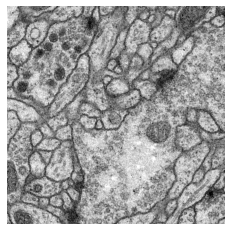

In [18]:
img1=mpimg.imread("/tmp/dataset-membranes/test/0.png")
plt.imshow(img1, cmap = 'gray')

plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

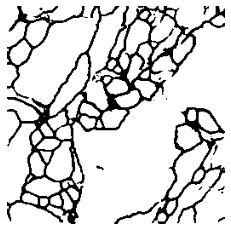

In [19]:
img2=mpimg.imread("/tmp/dataset-membranes/test/0_predict.png")
plt.imshow(img2, cmap = 'gray')

plt.axis('off')